# Assignment 1 - Algorithms and Data Structures Analysis

## What This Notebook Does

This notebook tests and compares different algorithms:
1. **UnionFind** - 4 different ways to solve the "connected components" problem
2. **3Sum** - 3 different ways to find triplets that sum to zero

## How to Use

1. **Run all cells** to see the performance analysis
2. **Check the plots** to see which algorithms are faster
3. **Look at the timing results** to understand Big O complexity

## What You'll See

- **Timing measurements** for different input sizes
- **Performance plots** showing which algorithms scale better
- **Real examples** of how the algorithms work


In [1]:
import sys

sys.path.append("../src")

import random

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from threesum import (
    generate_test_data,
    three_sum_brute_force,
    three_sum_optimized,
    three_sum_optimized_with_hash,
)
from unionfind import (
    QuickFind,
    QuickUnion,
    WeightedQuickUnion,
    WeightedQuickUnionPathCompression,
)

# Set style for better plots
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# Set random seed for reproducible results
random.seed(42)
np.random.seed(42)

print("Libraries imported successfully!")
print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

Libraries imported successfully!
Python version: 3.12.11 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:09:17) [GCC 11.2.0]
NumPy version: 2.0.1
Pandas version: 2.3.2
Matplotlib version: 3.10.5


In [2]:
def setup_unionfind_test(uf_class, n: int, operations: list[tuple[int, int]]):
    """Setup UnionFind instance and operations for %timeit testing."""
    uf = uf_class(n)

    def run_operations():
        for p, q in operations:
            uf.union(p, q)

    return run_operations


def generate_unionfind_operations(n: int, num_operations: int) -> list[tuple[int, int]]:
    """Generate random union operations for testing."""
    operations = []
    for _ in range(num_operations):
        p = random.randint(0, n - 1)
        q = random.randint(0, n - 1)
        operations.append((p, q))
    return operations


def setup_threesum_test(func, nums: list[int]):
    """Setup 3Sum function for %timeit testing."""

    def run_threesum():
        return func(nums)

    return run_threesum


print("Performance measurement functions defined!")

Performance measurement functions defined!


In [3]:
print("=== UnionFind Performance Analysis ===")

# Updated test parameters based on workshop feedback
n_values = [1000, 5000, 10000, 50000, 100000]

# UnionFind algorithms to test
uf_algorithms = [
    ("Quick Find", QuickFind),
    ("Quick Union", QuickUnion),
    ("Weighted Quick Union", WeightedQuickUnion),
    ("Weighted Quick Union with Path Compression", WeightedQuickUnionPathCompression),
]

# Store results
uf_results = []

for n in n_values:
    # Scale operations proportionally to N (~0.9 * N ratio as recommended)
    num_operations = int(0.9 * n)
    print(f"\nTesting with N = {n}, Operations = {num_operations}")
    operations = generate_unionfind_operations(n, num_operations)

    for name, uf_class in uf_algorithms:
        test_func = setup_unionfind_test(uf_class, n, operations)

        result = %timeit -q -o test_func() # pyright: ignore

        uf_results.append(
            {
                "Algorithm": name,
                "N": n,
                "Operations": num_operations,
                "Time (s)": result.best,
                "Average (s)": result.average,
            }
        )
        print(f"  {name}: {result.best:.6f}s (best), {result.average:.6f}s (avg)")

print(f"\nUnionFind analysis completed! {len(uf_results)} measurements taken.")

=== UnionFind Performance Analysis ===

Testing with N = 1000, Operations = 900
  Quick Find: 0.000066s (best), 0.000067s (avg)
  Quick Union: 0.001803s (best), 0.001816s (avg)
  Weighted Quick Union: 0.000165s (best), 0.000166s (avg)
  Weighted Quick Union with Path Compression: 0.000170s (best), 0.000172s (avg)

Testing with N = 5000, Operations = 4500
  Quick Find: 0.000292s (best), 0.000301s (avg)
  Quick Union: 0.042255s (best), 0.045540s (avg)
  Weighted Quick Union: 0.000842s (best), 0.000859s (avg)
  Weighted Quick Union with Path Compression: 0.000785s (best), 0.000809s (avg)

Testing with N = 10000, Operations = 9000
  Quick Find: 0.000575s (best), 0.000614s (avg)
  Quick Union: 0.181866s (best), 0.183129s (avg)
  Weighted Quick Union: 0.001699s (best), 0.001731s (avg)
  Weighted Quick Union with Path Compression: 0.001650s (best), 0.001657s (avg)

Testing with N = 50000, Operations = 45000
  Quick Find: 0.003005s (best), 0.003071s (avg)
  Quick Union: 4.408677s (best), 4.473

In [4]:
# 3Sum Performance Analysis
print("=== 3Sum Performance Analysis ===")

# Test parameters for 3Sum
# Ajusted test sizes based on workshop feedback
# Brute force: start smaller (80, 120, etc.) for easier slope calculation
array_sizes_brute = [80, 120, 200, 300, 400]
array_sizes_optimized = [500, 1000, 2000, 5000, 8000]

threesum_algorithms = [
    ("Brute Force", three_sum_brute_force),
    ("Optimized Two Pointers", three_sum_optimized),
    ("Hash Set", three_sum_optimized_with_hash),
]

# Store results
threesum_results = []

# Test brute force with smaller sizes first
print("\n--- Testing Brute Force with smaller sizes ---")
for size in array_sizes_brute:
    print(f"\nTesting Brute Force with array size = {size}")

    test_data = generate_test_data(size)

    name, func = threesum_algorithms[0]  # Brute Force
    test_func = setup_threesum_test(func, test_data)

    sample_result = func(test_data)
    result = %timeit -q -o test_func()  # pyright: ignore

    threesum_results.append({
        "Algorithm": name,
        "Array Size": size,
        "Time (s)": result.best,
        "Average (s)": result.average,
        "Solutions Found": len(sample_result),
    })
    print(f"  {name}: {result.best:.6f}s (best), "
          f"{result.average:.6f}s (avg), {len(sample_result)} solutions")

# Test optimized algorithms with larger sizes
print("\n--- Testing Optimized algorithms with larger sizes ---")
for size in array_sizes_optimized:
    print(f"\nTesting with array size = {size}")

    # Generate test data
    test_data = generate_test_data(size)

    for name, func in threesum_algorithms[1:]:  # Skip brute force
        test_func = setup_threesum_test(func, test_data)

        sample_result = func(test_data)
        result = %timeit -q -o test_func()  # pyright: ignore

        threesum_results.append({
            "Algorithm": name,
            "Array Size": size,
            "Time (s)": result.best,
            "Average (s)": result.average,
            "Solutions Found": len(sample_result),
        })
        print(f"  {name}: {result.best:.6f}s (best), "
              f"{result.average:.6f}s (avg), {len(sample_result)} solutions")

print(f"\n3Sum analysis completed! {len(threesum_results)} measurements taken.")

=== 3Sum Performance Analysis ===

--- Testing Brute Force with smaller sizes ---

Testing Brute Force with array size = 80
  Brute Force: 0.002133s (best), 0.002241s (avg), 258 solutions

Testing Brute Force with array size = 120
  Brute Force: 0.008152s (best), 0.008324s (avg), 1047 solutions

Testing Brute Force with array size = 200
  Brute Force: 0.037011s (best), 0.037963s (avg), 4853 solutions

Testing Brute Force with array size = 300
  Brute Force: 0.127776s (best), 0.131077s (avg), 16315 solutions

Testing Brute Force with array size = 400
  Brute Force: 0.326847s (best), 0.348774s (avg), 40065 solutions

--- Testing Optimized algorithms with larger sizes ---

Testing with array size = 500
  Optimized Two Pointers: 0.002206s (best), 0.002355s (avg), 3645 solutions
  Hash Set: 0.020324s (best), 0.021097s (avg), 51544 solutions

Testing with array size = 1000
  Optimized Two Pointers: 0.005026s (best), 0.005178s (avg), 5096 solutions
  Hash Set: 0.097440s (best), 0.099018s (avg

=== Creating Performance Visualizations ===

=== Slope Analysis for Complexity Verification ===

UnionFind Complexity Verification:
  Quick Find: slope = 1.00
  Quick Union: slope = 2.07
  Weighted Quick Union: slope = 1.05
  Weighted Quick Union with Path Compression: slope = 1.00

3Sum Complexity Verification:
  Brute Force: slope = 3.13 (expected: ~2.0 for O(N²), ~3.0 for O(N³))
  Optimized Two Pointers: slope = 0.99 (expected: ~2.0 for O(N²), ~3.0 for O(N³))
  Hash Set: slope = 2.35 (expected: ~2.0 for O(N²), ~3.0 for O(N³))


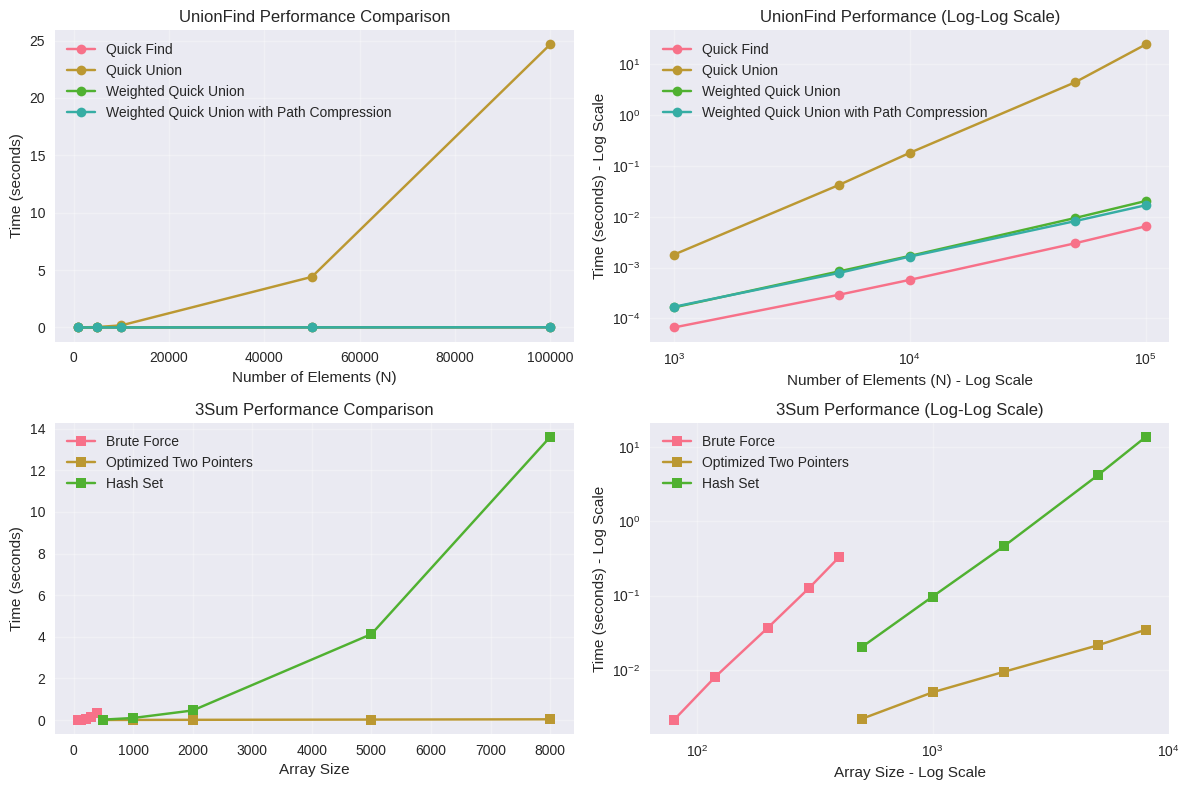

Visualizations created successfully!


In [5]:
# Visualization of Results
print("=== Creating Performance Visualizations ===")

# Convert results to DataFrames for easier plotting
uf_df = pd.DataFrame(uf_results)
threesum_df = pd.DataFrame(threesum_results)

# Slope verification for complexity analysis
print("\n=== Slope Analysis for Complexity Verification ===")

# Minimum data points required for slope calculation
MIN_DATA_POINTS = 2

# UnionFind slope analysis
print("\nUnionFind Complexity Verification:")
for algorithm in uf_df["Algorithm"].unique():
    data = uf_df[uf_df["Algorithm"] == algorithm].sort_values("N")
    if len(data) >= MIN_DATA_POINTS:
        # Calculate slope between first and last points in log-log space
        log_n = np.log10(data["N"].values)
        log_time = np.log10(data["Time (s)"].values)
        slope = (log_time[-1] - log_time[0]) / (log_n[-1] - log_n[0])
        print(f"  {algorithm}: slope = {slope:.2f}")

# 3Sum slope analysis
print("\n3Sum Complexity Verification:")
for algorithm in threesum_df["Algorithm"].unique():
    data = threesum_df[threesum_df["Algorithm"] == algorithm].sort_values("Array Size")
    if len(data) >= MIN_DATA_POINTS:
        log_size = np.log10(data["Array Size"].values)
        log_time = np.log10(data["Time (s)"].values)
        slope = (log_time[-1] - log_time[0]) / (log_size[-1] - log_size[0])
        print(f"  {algorithm}: slope = {slope:.2f} "
              f"(expected: ~2.0 for O(N²), ~3.0 for O(N³))")

# Create UnionFind performance plot
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for algorithm in uf_df["Algorithm"].unique():
    data = uf_df[uf_df["Algorithm"] == algorithm]
    plt.plot(data["N"], data["Time (s)"], marker="o", label=algorithm)
plt.xlabel("Number of Elements (N)")
plt.ylabel("Time (seconds)")
plt.title("UnionFind Performance Comparison")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
for algorithm in uf_df["Algorithm"].unique():
    data = uf_df[uf_df["Algorithm"] == algorithm]
    plt.loglog(data["N"], data["Time (s)"], marker="o", label=algorithm)
plt.xlabel("Number of Elements (N) - Log Scale")
plt.ylabel("Time (seconds) - Log Scale")
plt.title("UnionFind Performance (Log-Log Scale)")
plt.legend()
plt.grid(True, alpha=0.3)

# Create 3Sum performance plot
plt.subplot(2, 2, 3)
for algorithm in threesum_df["Algorithm"].unique():
    data = threesum_df[threesum_df["Algorithm"] == algorithm]
    plt.plot(data["Array Size"], data["Time (s)"], marker="s", label=algorithm)
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.title("3Sum Performance Comparison")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
for algorithm in threesum_df["Algorithm"].unique():
    data = threesum_df[threesum_df["Algorithm"] == algorithm]
    plt.loglog(data["Array Size"], data["Time (s)"], marker="s", label=algorithm)
plt.xlabel("Array Size - Log Scale")
plt.ylabel("Time (seconds) - Log Scale")
plt.title("3Sum Performance (Log-Log Scale)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualizations created successfully!")